# Classify using start=0 mid = 1 end = 2

In [1]:
import sys
import pandas as pd
import numpy as np

## 1. Read dataset

In [2]:
dirname = '../../datasets/marked_start_mid_end/'
suffix = '.csv'

def read_from_file( file_name, rand_num):
    
    try:
        full_file_name = file_name + str(rand_num) + "_kinect"

        file_at_path = dirname + full_file_name + suffix

        data = pd.read_csv(file_at_path)
        
        return data, full_file_name
    
    except IOError as e:
        print(e)
        return None,None

## 2. Read files

### 2.1 The A series (A1-A159)

In [3]:
raw_data, full_file_name = read_from_file("A", 1)

#print(full_file_name)
print(raw_data.shape)

for i in range(2,160):
    input_data, full_file_name = read_from_file("A", i)
    
    if(full_file_name is None):
        continue
    else:
        #print(full_file_name)
        raw_data = raw_data.append(input_data, ignore_index = True)

print(raw_data.shape)

(229, 41)
[Errno 2] No such file or directory: '../../datasets/marked_start_mid_end/A60_kinect.csv'
[Errno 2] No such file or directory: '../../datasets/marked_start_mid_end/A107_kinect.csv'
(32387, 41)


### 2.2 The B series (B1-B22)

In [4]:
for i in range(1,23):
    input_data, full_file_name = read_from_file("B", i)
    
    if(full_file_name is None):
        continue
    else:
        #print(full_file_name)
        raw_data = raw_data.append(input_data, ignore_index = True)

print(raw_data.shape)

(37782, 41)


In [5]:
raw_data.fillna(0)

,FrameNo,head_x,head_y,head_z,left_shoulder_x,left_shoulder_y,left_shoulder_z,left_elbow_x,left_elbow_y,left_elbow_z,...,right_knee_x,right_knee_y,right_knee_z,left_foot_x,left_foot_y,left_foot_z,right_foot_x,right_foot_y,right_foot_z,status
0,0,0.009962,0.75910,0.015747,-0.15673,0.46100,0.028399,-0.18256,0.20732,0.018668,...,0.113710,-0.37810,-0.030049,-0.135150,-0.74477,-0.045770,0.129800,-0.74631,-0.060231,0
1,1,0.010491,0.75974,0.017753,-0.15662,0.46125,0.029317,-0.18223,0.20594,0.020562,...,0.113780,-0.37805,-0.030093,-0.134930,-0.74433,-0.045317,0.130490,-0.74087,-0.056886,0
2,2,0.010730,0.75990,0.018405,-0.15668,0.46150,0.029991,-0.18164,0.20587,0.021215,...,0.113770,-0.37790,-0.030111,-0.135180,-0.74493,-0.045716,0.130040,-0.74171,-0.057271,0
3,3,0.010916,0.76001,0.019369,-0.15645,0.46188,0.030573,-0.18095,0.20619,0.021357,...,0.113760,-0.37788,-0.030140,-0.135170,-0.74509,-0.045595,0.130050,-0.74267,-0.057693,0
4,4,0.011140,0.75994,0.019772,-0.15642,0.46199,0.030829,-0.18034,0.20624,0.021669,...,0.113680,-0.37791,-0.030162,-0.135110,-0.74538,-0.045998,0.130400,-0.74201,-0.057177,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37777,235,-0.017153,0.76394,0.046570,-0.17340,0.47949,-0.011006,-0.24563,0.28570,-0.059760,...,0.082834,-0.33250,0.032942,-0.099983,-0.67321,0.037888,0.092230,-0.66897,0.035241,2
37778,236,-0.017700,0.76488,0.047120,-0.17220,0.47846,-0.013577,-0.24368,0.28802,-0.072414,...,0.082818,-0.33391,0.033180,-0.099923,-0.67313,0.037897,0.092134,-0.66866,0.035156,2
37779,237,-0.018257,0.76646,0.048112,-0.17155,0.47633,-0.017028,-0.23788,0.28956,-0.088592,...,0.081940,-0.32971,0.031456,-0.099905,-0.67315,0.037819,0.092173,-0.66856,0.035108,2
37780,238,-0.019091,0.76760,0.048815,-0.17060,0.47342,-0.023125,-0.23001,0.29131,-0.108770,...,0.081628,-0.33299,0.031661,-0.099949,-0.67324,0.037719,0.091919,-0.66899,0.034746,2


In [6]:
start_0, mid_1, end_2 = np.bincount(raw_data['status'])
print(
    'Frames:\n    Total: {}\n    Before: {} ({:.2f}% of total)\n    During: {} ({:.2f}% of total)\n    After: {} ({:.2f}% of total)\n'
    .format(
      len(raw_data), 
      start_0,
      start_0 / len(raw_data),
      mid_1,
      mid_1 / len(raw_data),
      end_2,
      end_2 / len(raw_data)
    )
  )

Frames:
    Total: 37782
    Before: 7814 (0.21% of total)
    During: 22931 (0.61% of total)
    After: 7037 (0.19% of total)



In [7]:
cleaned_data = raw_data.copy()
cleaned_data.pop( 'FrameNo')

0          0
1          1
2          2
3          3
4          4
        ... 
37777    235
37778    236
37779    237
37780    238
37781    239
Name: FrameNo, Length: 37782, dtype: int64

In [8]:
# Use a utility from sklearn to split and shuffle our dataset.

from sklearn.model_selection import train_test_split

train_data, test_data = train_test_split(cleaned_data, test_size=0.2)
train_data, val_data = train_test_split(train_data, test_size=0.2)

# Form np arrays of labels and features.
train_labels = np.array(train_data.pop('status'))
val_labels = np.array(val_data.pop('status'))
test_labels = np.array(test_data.pop('status'))

train_features = np.array(train_data)
val_features = np.array(val_data)
test_features = np.array(test_data)

### Normalization
Normalize the input features using the sklearn StandardScaler. This will set the mean to 0 and standard deviation to 1.

In [9]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
train_features = scaler.fit_transform(train_features)
val_features = scaler.transform(val_features)
test_features = scaler.transform(test_features)

print('Training labels shape:', train_labels.shape)
print('Validation labels shape:', val_labels.shape)
print('Test labels shape:', test_labels.shape)

print('Training features shape:', train_features.shape)
print('Validation features shape:', val_features.shape)
print('Test features shape:', test_features.shape)

Training labels shape: (24180,)
Validation labels shape: (6045,)
Test labels shape: (7557,)
Training features shape: (24180, 39)
Validation features shape: (6045, 39)
Test features shape: (7557, 39)


In [10]:
import tensorflow as tf
from tensorflow import keras

INFO:tensorflow:Enabling eager execution
INFO:tensorflow:Enabling v2 tensorshape
INFO:tensorflow:Enabling resource variables
INFO:tensorflow:Enabling tensor equality
INFO:tensorflow:Enabling control flow v2


In [11]:
METRICS = [
      keras.metrics.TruePositives(name='tp'),
      keras.metrics.FalsePositives(name='fp'),
      keras.metrics.TrueNegatives(name='tn'),
      keras.metrics.FalseNegatives(name='fn'), 
      keras.metrics.BinaryAccuracy(name='accuracy'),
      keras.metrics.Precision(name='precision'),
      keras.metrics.Recall(name='recall'),
      keras.metrics.AUC(name='auc'),
      keras.metrics.AUC(name='prc', curve='PR'), # precision-recall curve
]

In [12]:
def make_model(metrics=METRICS, optimizer='Adam',loss = 'categorical_crossentropy'):
    model = keras.Sequential([
        keras.layers.Dense(units=16, activation='relu',input_dim=train_features.shape[-1]),
        keras.layers.Dense(32, activation='relu' ),
        keras.layers.Dense(1, activation='sigmoid'),
    ])
    
    model.compile(optimizer=optimizer, loss=loss, metrics=metrics)
    #keras.losses.BinaryCrossentropy()
    return model

In [13]:
EPOCHS = 100
BATCH_SIZE = 2048

early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_prc', verbose=1,patience=10,mode='max',restore_best_weights=True)

In [14]:
model = make_model()
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                640       
_________________________________________________________________
dense_1 (Dense)              (None, 32)                544       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 33        
Total params: 1,217
Trainable params: 1,217
Non-trainable params: 0
_________________________________________________________________


# Checkpoint the initial weights

In [15]:
import os
import tempfile

initial_weights = os.path.join(tempfile.mkdtemp(), 'initial_weights')
model.save_weights(initial_weights)

In [16]:
history = model.fit(
    train_features,
    train_labels,
    batch_size=BATCH_SIZE,
    epochs=EPOCHS,
    callbacks=[early_stopping],
    validation_data=(val_features, val_labels))

Epoch 1/100
12/12 [==============================] - 2s 71ms/step - loss: 0.0000e+00 - tp: 34.6923 - fp: 0.0000e+00 - tn: 2920.3077 - fn: 11162.5385 - accuracy: 0.2081 - precision: 1.0000 - recall: 0.0021 - auc: 0.3425 - prc: 0.7427 - val_loss: 0.0000e+00 - val_tp: 268.0000 - val_fp: 0.0000e+00 - val_tn: 1253.0000 - val_fn: 4524.0000 - val_accuracy: 0.2074 - val_precision: 1.0000 - val_recall: 0.0559 - val_auc: 0.5456 - val_prc: 0.8510
Epoch 2/100
12/12 [==============================] - 0s 5ms/step - loss: 0.0000e+00 - tp: 705.3077 - fp: 0.0000e+00 - tn: 2892.2308 - fn: 10520.0000 - accuracy: 0.2052 - precision: 1.0000 - recall: 0.0616 - auc: 0.5952 - prc: 0.8709 - val_loss: 0.0000e+00 - val_tp: 346.0000 - val_fp: 0.0000e+00 - val_tn: 1253.0000 - val_fn: 4446.0000 - val_accuracy: 0.2098 - val_precision: 1.0000 - val_recall: 0.0722 - val_auc: 0.6972 - val_prc: 0.9066
Epoch 3/100
12/12 [==============================] - 0s 5ms/step - loss: 0.0000e+00 - tp: 822.4615 - fp: 0.0000e+00 - tn

In [17]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


def plot_cm(labels, predictions, p=0.5):
    cm = confusion_matrix(labels, predictions > p)
    plt.figure(figsize=(5,5))
    sns.heatmap(cm, annot=True, fmt="d")
    plt.title('Confusion matrix @{:.2f}'.format(p))
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')

In [18]:
train_predictions_baseline = model.predict(train_features, batch_size=BATCH_SIZE)
test_predictions_baseline = model.predict(test_features, batch_size=BATCH_SIZE)

loss :  0.0
tp :  1724.0
fp :  8.0
tn :  1580.0
fn :  4245.0
accuracy :  0.3775307536125183
precision :  0.9953810572624207
recall :  0.2888256013393402
auc :  0.7925705909729004
prc :  0.9430023431777954



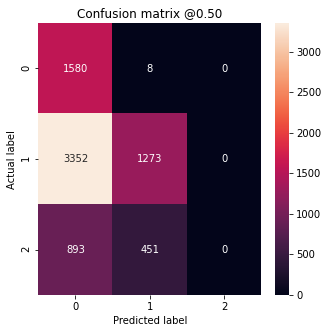

In [19]:
results = model.evaluate(test_features, test_labels, batch_size=BATCH_SIZE, verbose=0)
for name, value in zip(model.metrics_names, results):
  print(name, ': ', value)
print()

plot_cm(test_labels, test_predictions_baseline)

#plot_cm(train_labels, train_predictions_baseline)

# Class weights

In [20]:
weight_for_0 = (1 / start_0)*(len(raw_data))/3.0 
weight_for_1 = (1 / mid_1)*(len(raw_data))/3.0
weight_for_2 = (1 / end_2)*(len(raw_data))/3.0

class_weight = {0: weight_for_0, 1: weight_for_1, 2: weight_for_2}

print('Weight for class 0: {:.2f}'.format(weight_for_0))
print('Weight for class 1: {:.2f}'.format(weight_for_1))
print('Weight for class 2: {:.2f}'.format(weight_for_2))

Weight for class 0: 1.61
Weight for class 1: 0.55
Weight for class 2: 1.79


In [21]:
weighted_model = make_model()
weighted_model.load_weights(initial_weights)

weighted_history = weighted_model.fit(
    train_features,
    train_labels,
    batch_size=BATCH_SIZE,
    epochs=EPOCHS,
    callbacks=[early_stopping],
    validation_data=(val_features, val_labels),
    # The class weights go here
    class_weight=class_weight)

Instructions for updating:
The `validate_indices` argument has no effect. Indices are always validated on CPU and never validated on GPU.
Epoch 1/100
12/12 [==============================] - 2s 75ms/step - loss: 0.0000e+00 - tp: 1759.3077 - fp: 8.0000 - tn: 4479.0000 - fn: 15428.2308 - accuracy: 0.2746 - precision: 0.9955 - recall: 0.1171 - auc: 0.5862 - prc: 0.8542 - val_loss: 0.0000e+00 - val_tp: 273.0000 - val_fp: 0.0000e+00 - val_tn: 1253.0000 - val_fn: 4519.0000 - val_accuracy: 0.2074 - val_precision: 1.0000 - val_recall: 0.0570 - val_auc: 0.5411 - val_prc: 0.8482
Epoch 2/100
12/12 [==============================] - 0s 5ms/step - loss: 0.0000e+00 - tp: 704.3846 - fp: 0.0000e+00 - tn: 2882.1538 - fn: 10531.0000 - accuracy: 0.2030 - precision: 1.0000 - recall: 0.0604 - auc: 0.5864 - prc: 0.8685 - val_loss: 0.0000e+00 - val_tp: 358.0000 - val_fp: 0.0000e+00 - val_tn: 1253.0000 - val_fn: 4434.0000 - val_accuracy: 0.2111 - val_precision: 1.0000 - val_recall: 0.0747 - val_auc: 0.6983 - 

In [22]:
train_predictions_weighted = weighted_model.predict(train_features, batch_size=BATCH_SIZE)
test_predictions_weighted = weighted_model.predict(test_features, batch_size=BATCH_SIZE)

loss :  0.0
tp :  1791.0
fp :  9.0
tn :  1579.0
fn :  4178.0
accuracy :  0.3858674168586731
precision :  0.9950000047683716
recall :  0.3000502586364746
auc :  0.8107882738113403
prc :  0.9474824666976929



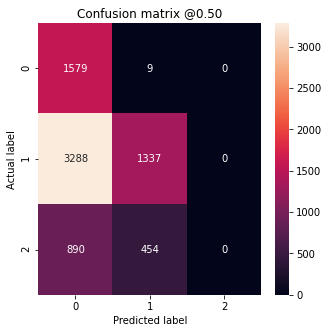

In [23]:
weighted_results = weighted_model.evaluate(test_features, test_labels,
                                           batch_size=BATCH_SIZE, verbose=0)
for name, value in zip(weighted_model.metrics_names, weighted_results):
  print(name, ': ', value)
print()

plot_cm(test_labels, test_predictions_weighted)

In [24]:
# over sample

In [25]:
from imblearn.over_sampling import SMOTE

oversample = SMOTE()
train_features_sm, train_labels_sm = oversample.fit_resample(train_features, train_labels)
print(train_features_sm.shape,train_labels_sm.shape)

(43974, 39) (43974,)


In [26]:
os_model = make_model()
os_model.load_weights(initial_weights)
os_model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 16)                640       
_________________________________________________________________
dense_7 (Dense)              (None, 32)                544       
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 33        
Total params: 1,217
Trainable params: 1,217
Non-trainable params: 0
_________________________________________________________________


In [27]:
history = os_model.fit(
    train_features_sm,
    train_labels_sm,
    batch_size=BATCH_SIZE,
    epochs=EPOCHS,
    callbacks=[early_stopping],
    validation_data=(val_features, val_labels))

Epoch 1/100
22/22 [==============================] - 2s 37ms/step - loss: 0.0000e+00 - tp: 2425.1304 - fp: 9.0000 - tn: 9726.7826 - fn: 19788.9565 - accuracy: 0.3501 - precision: 0.9960 - recall: 0.1201 - auc: 0.5320 - prc: 0.7695 - val_loss: 0.0000e+00 - val_tp: 348.0000 - val_fp: 0.0000e+00 - val_tn: 1253.0000 - val_fn: 4444.0000 - val_accuracy: 0.2099 - val_precision: 1.0000 - val_recall: 0.0726 - val_auc: 0.6771 - val_prc: 0.8978
Epoch 2/100
22/22 [==============================] - 0s 4ms/step - loss: 0.0000e+00 - tp: 2494.4348 - fp: 4.6957 - tn: 8127.0435 - fn: 13766.6957 - accuracy: 0.3356 - precision: 0.9989 - recall: 0.1530 - auc: 0.6781 - prc: 0.8384 - val_loss: 0.0000e+00 - val_tp: 424.0000 - val_fp: 9.0000 - val_tn: 1244.0000 - val_fn: 4368.0000 - val_accuracy: 0.2184 - val_precision: 0.9792 - val_recall: 0.0885 - val_auc: 0.7603 - val_prc: 0.9302
Epoch 3/100
22/22 [==============================] - 0s 8ms/step - loss: 0.0000e+00 - tp: 3087.7826 - fp: 34.8696 - tn: 8086.0870

In [28]:
train_predictions_os = os_model.predict(train_features_sm, batch_size=BATCH_SIZE)
test_predictions_os = os_model.predict(test_features, batch_size=BATCH_SIZE)

loss :  0.0
tp :  2000.0
fp :  9.0
tn :  1579.0
fn :  3969.0
accuracy :  0.4133915603160858
precision :  0.9955201745033264
recall :  0.33506450057029724
auc :  0.8053010702133179
prc :  0.946358323097229



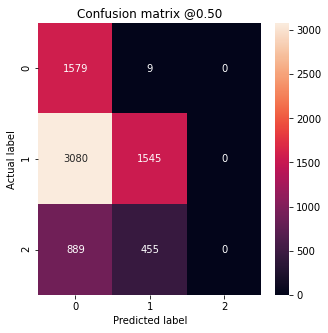

In [29]:
results = os_model.evaluate(test_features, test_labels, batch_size=BATCH_SIZE, verbose=0)
for name, value in zip(os_model.metrics_names, results):
  print(name, ': ', value)
print()

plot_cm(test_labels, test_predictions_os)

#plot_cm(train_labels, train_predictions_baseline)

# Data aug

In [30]:
def mirrorY(raw_data, posenet=False):
    
    try:
        aug_data_y_mirror = raw_data.copy()
        
        if posenet:
            aug_data_y_mirror = aug_data_y_mirror.append(aug_data_y_mirror.assign(head_y=-aug_data_y_mirror['head_y'],
                                                                                  leftShoulder_y=-aug_data_y_mirror['leftShoulder_y'], 
                                                                                  rightShoulder_y=-aug_data_y_mirror['rightShoulder_y'],
                                                                                  leftElbow_y=-aug_data_y_mirror['leftElbow_y'],
                                                                                  rightElbow_y=-aug_data_y_mirror['rightElbow_y'],
                                                                                  leftWrist_y=-aug_data_y_mirror['leftWrist_y'],
                                                                                  rightWrist_y=-aug_data_y_mirror['rightWrist_y'],
                                                                                  leftHip_y=-aug_data_y_mirror['leftHip_y'],
                                                                                  rightHip_y=-aug_data_y_mirror['rightHip_y'],
                                                                                  leftKnee_y=-aug_data_y_mirror['leftKnee_y'],
                                                                                  rightKnee_y=-aug_data_y_mirror['rightKnee_y'],
                                                                                  leftAnkle_y=-aug_data_y_mirror['leftAnkle_y'],
                                                                                  rightAnkle_y=-aug_data_y_mirror['rightAnkle_y']))
        else:
            aug_data_y_mirror = aug_data_y_mirror.append(aug_data_y_mirror.assign(head_y=-aug_data_y_mirror['head_y'],
                                                                                  left_shoulder_y=-aug_data_y_mirror['left_shoulder_y'], 
                                                                                  left_elbow_y=-aug_data_y_mirror['left_elbow_y'],
                                                                                  right_shoulder_y=-aug_data_y_mirror['right_shoulder_y'],
                                                                                  right_elbow_y=-aug_data_y_mirror['right_elbow_y'],
                                                                                  left_hand_y=-aug_data_y_mirror['left_hand_y'],
                                                                                  right_hand_y=-aug_data_y_mirror['right_hand_y'],
                                                                                  left_hip_y=-aug_data_y_mirror['left_hip_y'],
                                                                                  right_hip_y=-aug_data_y_mirror['right_hip_y'],
                                                                                  left_knee_y=-aug_data_y_mirror['left_knee_y'],
                                                                                  right_knee_y=-aug_data_y_mirror['right_knee_y'],
                                                                                  left_foot_y=-aug_data_y_mirror['left_foot_y'],
                                                                                  right_foot_y=-aug_data_y_mirror['right_foot_y']))
        
        
        #print(raw_data.shape)
        #print(aug_data_y_mirror.shape)
        return aug_data_y_mirror
    
    except IOError as e:
        print(e)
        return None

In [34]:
def augMultiplier(raw_data, multiplier):
    
    try:
        aug_data_offset = raw_data.copy()
        #print(aug_data_offset.head())
        aug_data_offset *= multiplier
        #print(aug_data_offset.head())
        return aug_data_y_mirror
    
    except IOError as e:
        print(e)
        return None

In [35]:
aug_data_y_mirror = mirrorY(raw_data)

In [36]:
aug_data_offset = augMultiplier(raw_data, multiplier=2)

In [ ]:
aug_data_offset = augMultiplier(raw_data, multiplier=0.5)